**In this file I will use the emission data to genereate year by year emission percentages for different food items**

In [1]:
import numpy as np 
import pandas as pd 
import os 
import glob
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

warnings.filterwarnings('ignore') 

In [2]:
emr_list = glob.glob('emissions_v3\*_all.csv')
emr_list = [x for x in emr_list if 'total_all.csv' not in x]
emr_list

['emissions_v3\\Beans_and_legumes_all.csv',
 'emissions_v3\\Cheese_all.csv',
 'emissions_v3\\Eggs_all.csv',
 'emissions_v3\\Fruits_all.csv',
 'emissions_v3\\Fruit_juices_all.csv',
 'emissions_v3\\Milk_all.csv',
 'emissions_v3\\Non_starchy_vegetables_all.csv',
 'emissions_v3\\Nuts_all.csv',
 'emissions_v3\\Other_starchy_vegetables_all.csv',
 'emissions_v3\\Potatoes_all.csv',
 'emissions_v3\\refined_grains_all.csv',
 'emissions_v3\\seafoods_all.csv',
 'emissions_v3\\Total_processed_meats_all.csv',
 'emissions_v3\\Unprocessed_red_meats_all.csv',
 'emissions_v3\\whole_grains_all.csv',
 'emissions_v3\\Yoghurt_all.csv']

In [3]:
emr_data = []

for i in emr_list:
    name = i.split('\\')[1].split('_all.csv')[0]
    temp = pd.read_csv(i)
    temp = temp[temp['iso3'] == 'EMR']
    for _, row in temp.iterrows():
        year = row['year']
        cons = row['median']
        emis = row['emissions']
        emr_data.append({
            'food_item': name,
            'year': year,
            'consumption': cons,
            'emission': emis
        })

emr_df = pd.DataFrame(emr_data)

In [4]:
emr_df.drop(emr_df[emr_df['year'] == 2020].index, inplace=True)
emr_df

,food_item,year,consumption,emission
0,Beans_and_legumes,1990,32.325374,24.787679
1,Beans_and_legumes,1995,30.025119,23.023802
2,Beans_and_legumes,2000,32.745006,25.109460
3,Beans_and_legumes,2005,34.113871,26.159130
4,Beans_and_legumes,2010,35.919824,27.543967
...,...,...,...,...
108,Yoghurt,2000,52.099532,188.542477
109,Yoghurt,2005,50.321801,182.109062
110,Yoghurt,2010,57.045312,206.440708
111,Yoghurt,2015,53.019956,191.873388


In [5]:
global_list = glob.glob('global_emissions\*_all.csv')
global_list = [x for x in global_list if 'total_all.csv' not in x]

global_data = []

for i in global_list:
    name = i.split('\\')[1].split('_all.csv')[0]
    temp = pd.read_csv(i)
    for _, row in temp.iterrows():
        year = row['year']
        cons = row['median']
        emis = row['emissions']
        global_data.append({
            'food_item': name,
            'year': year,
            'consumption': cons,
            'emission': emis
        })

global_df = pd.DataFrame(global_data)
global_df.drop(global_df[global_df['year'] == 2020].index, inplace=True)
global_df

,food_item,year,consumption,emission
0,Beans_and_legumes,1990.0,25.098932,19.246313
1,Beans_and_legumes,1995.0,25.970915,19.914965
2,Beans_and_legumes,2000.0,26.273340,20.146870
3,Beans_and_legumes,2005.0,26.383993,20.231721
4,Beans_and_legumes,2010.0,27.216255,20.869914
...,...,...,...,...
108,Yoghurt,2000.0,21.950716,79.437227
109,Yoghurt,2005.0,22.575714,81.699026
110,Yoghurt,2010.0,22.788971,82.470779
111,Yoghurt,2015.0,20.211290,73.142435


In [6]:
total_1990 = emr_df[emr_df['year'] == 1990]
total_1990 = total_1990.round(2)
total_1990

,food_item,year,consumption,emission
0,Beans_and_legumes,1990,32.33,24.79
7,Cheese,1990,9.54,85.94
14,Eggs,1990,20.31,63.06
21,Fruits,1990,83.51,32.57
28,Fruit_juices,1990,23.53,15.30
35,Milk,1990,97.36,113.41
42,Non_starchy_vegetables,1990,132.33,67.50
49,Nuts,1990,4.66,8.63
56,Other_starchy_vegetables,1990,23.57,11.03
63,Potatoes,1990,41.53,6.29


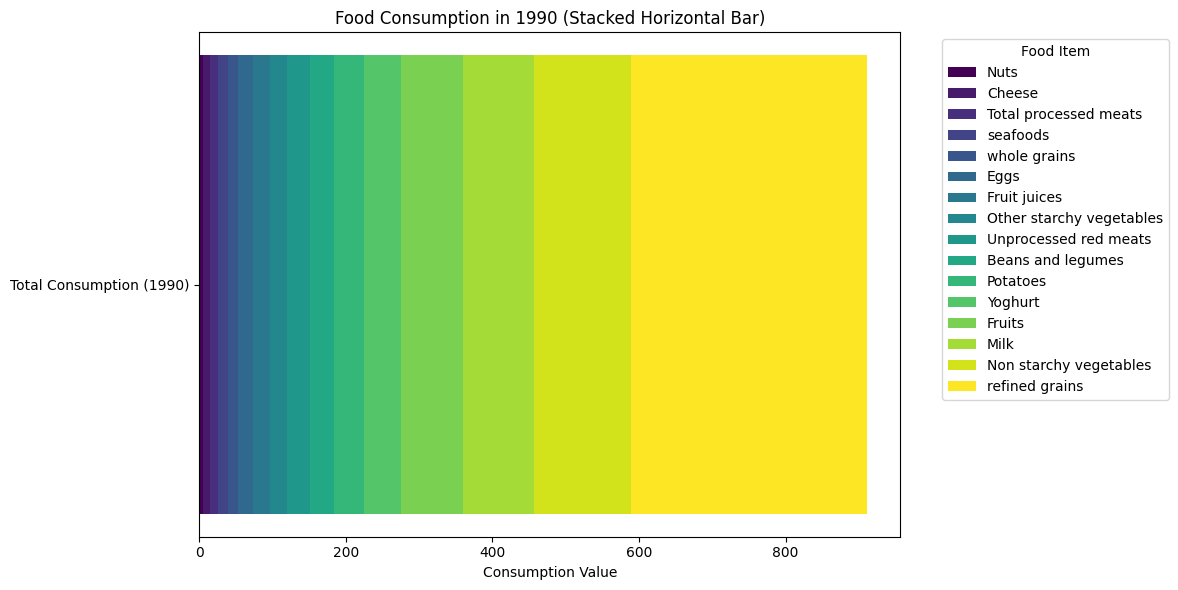

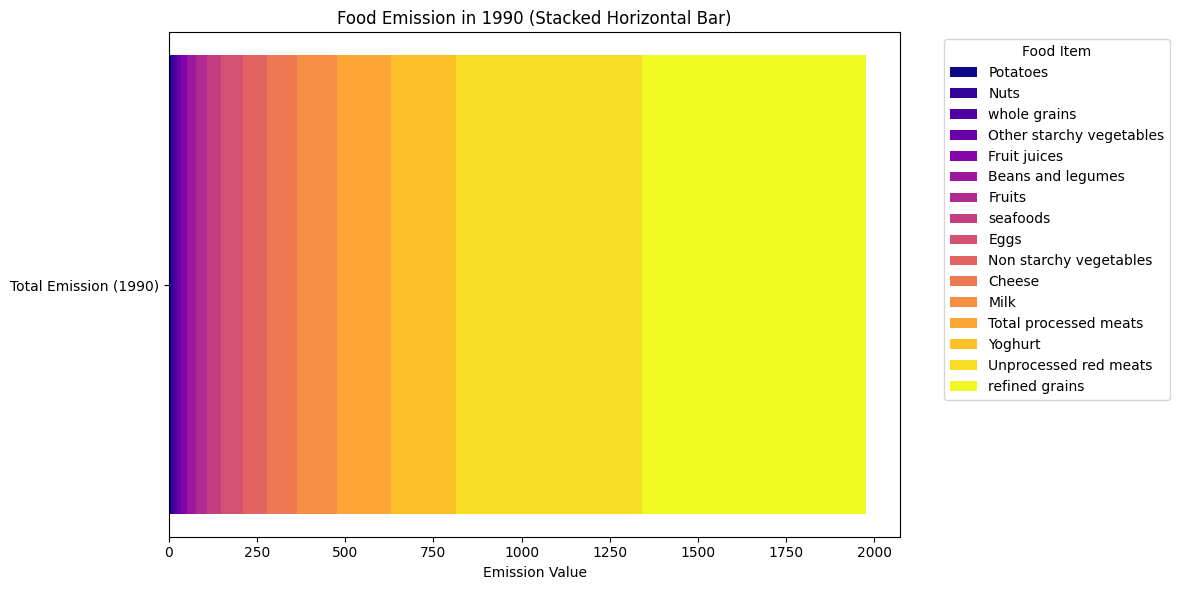

Plots generated. If you are in an environment like Jupyter, they will be displayed.
If not, the script will save them or show them in a new window depending on your Matplotlib backend.


In [7]:
# Sort by consumption and emission to make the plots easier to read, optional
df_sorted_consumption = total_1990.sort_values('consumption', ascending=True)
df_sorted_emission = total_1990.sort_values('emission', ascending=True)

# --- Create Stacked Horizontal Bar Plot for Consumption ---

# Set food_item as index for plotting
plot_df_consumption = df_sorted_consumption.set_index('food_item')[['consumption']]

# Transpose the dataframe to have food items as columns
plot_df_consumption_transposed = plot_df_consumption.transpose()

# Define colors for each food item
# Using a colormap to get distinct colors
num_items = len(df_sorted_consumption['food_item'])
colors_consumption = plt.cm.viridis(np.linspace(0, 1, num_items)) # You can choose other colormaps like 'plasma', 'inferno', 'magma', 'cividis'

# Create the plot
fig_consumption, ax_consumption = plt.subplots(figsize=(12, 6)) # Adjust figure size as needed

# Plot each food item as a segment of the stacked bar
left_consumption = 0 # Initialize the starting point for each segment
for idx, food_item in enumerate(plot_df_consumption_transposed.columns):
    value = plot_df_consumption_transposed[food_item]['consumption']
    ax_consumption.barh(
        'Total Consumption (1990)',  # Category label for the y-axis
        value,                       # Width of the bar segment
        left=left_consumption,       # Starting position of the segment
        label=food_item.replace('_', ' '), # Legend label
        color=colors_consumption[idx]
    )
    left_consumption += value # Update the starting point for the next segment

# Add labels and title
ax_consumption.set_xlabel('Consumption Value')
ax_consumption.set_title('Food Consumption in 1990 (Stacked Horizontal Bar)')
ax_consumption.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# --- Create Stacked Horizontal Bar Plot for Emission ---

# Set food_item as index for plotting
plot_df_emission = df_sorted_emission.set_index('food_item')[['emission']]

# Transpose the dataframe
plot_df_emission_transposed = plot_df_emission.transpose()

# Define colors for each food item (can use the same colormap or a different one)
colors_emission = plt.cm.plasma(np.linspace(0, 1, num_items))

# Create the plot
fig_emission, ax_emission = plt.subplots(figsize=(12, 6))

# Plot each food item
left_emission = 0
for idx, food_item in enumerate(plot_df_emission_transposed.columns):
    value = plot_df_emission_transposed[food_item]['emission']
    ax_emission.barh(
        'Total Emission (1990)',
        value,
        left=left_emission,
        label=food_item.replace('_', ' '),
        color=colors_emission[idx]
    )
    left_emission += value

# Add labels and title
ax_emission.set_xlabel('Emission Value')
ax_emission.set_title('Food Emission in 1990 (Stacked Horizontal Bar)')
ax_emission.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Plots generated. If you are in an environment like Jupyter, they will be displayed.")
print("If not, the script will save them or show them in a new window depending on your Matplotlib backend.")


--- Generating consolidated plot for Consumption ---


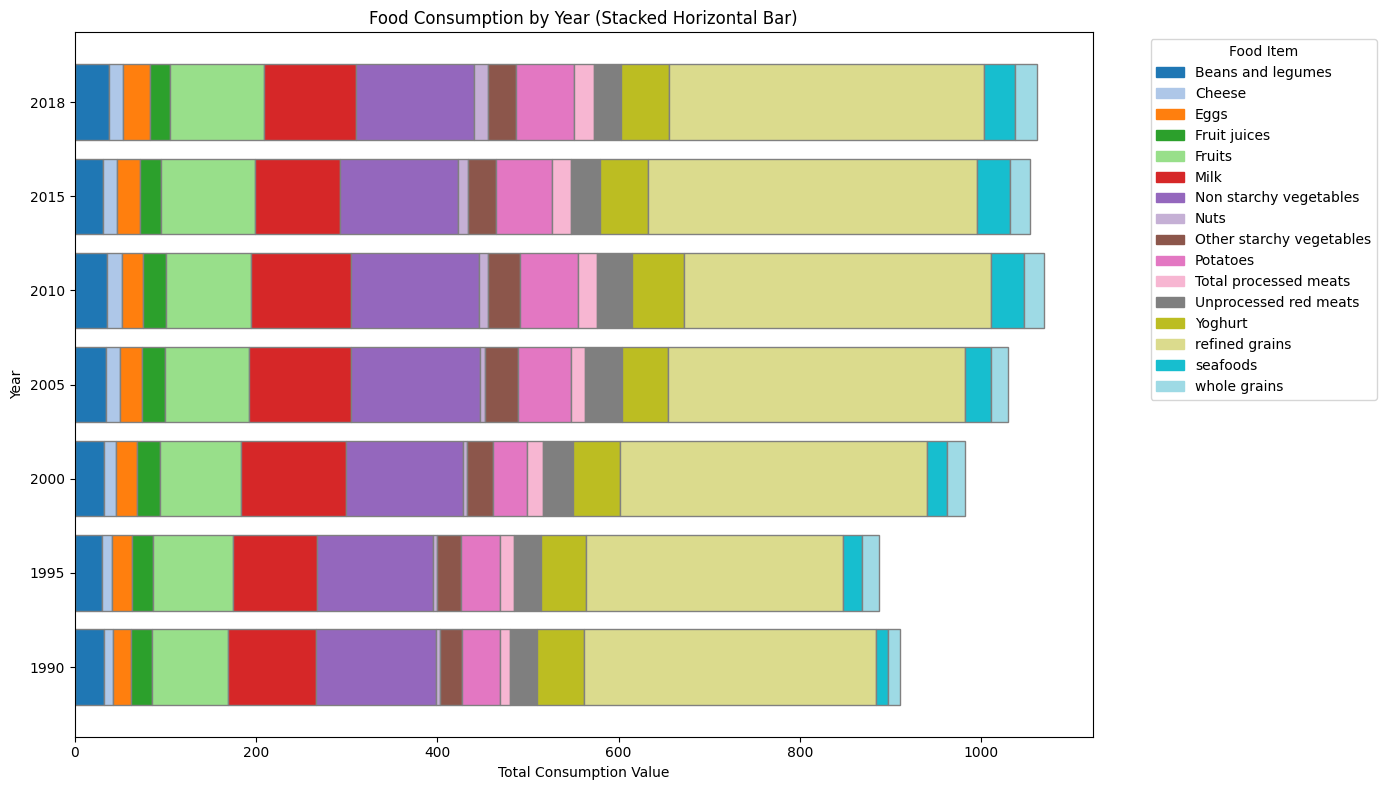


--- Generating consolidated plot for Emission ---


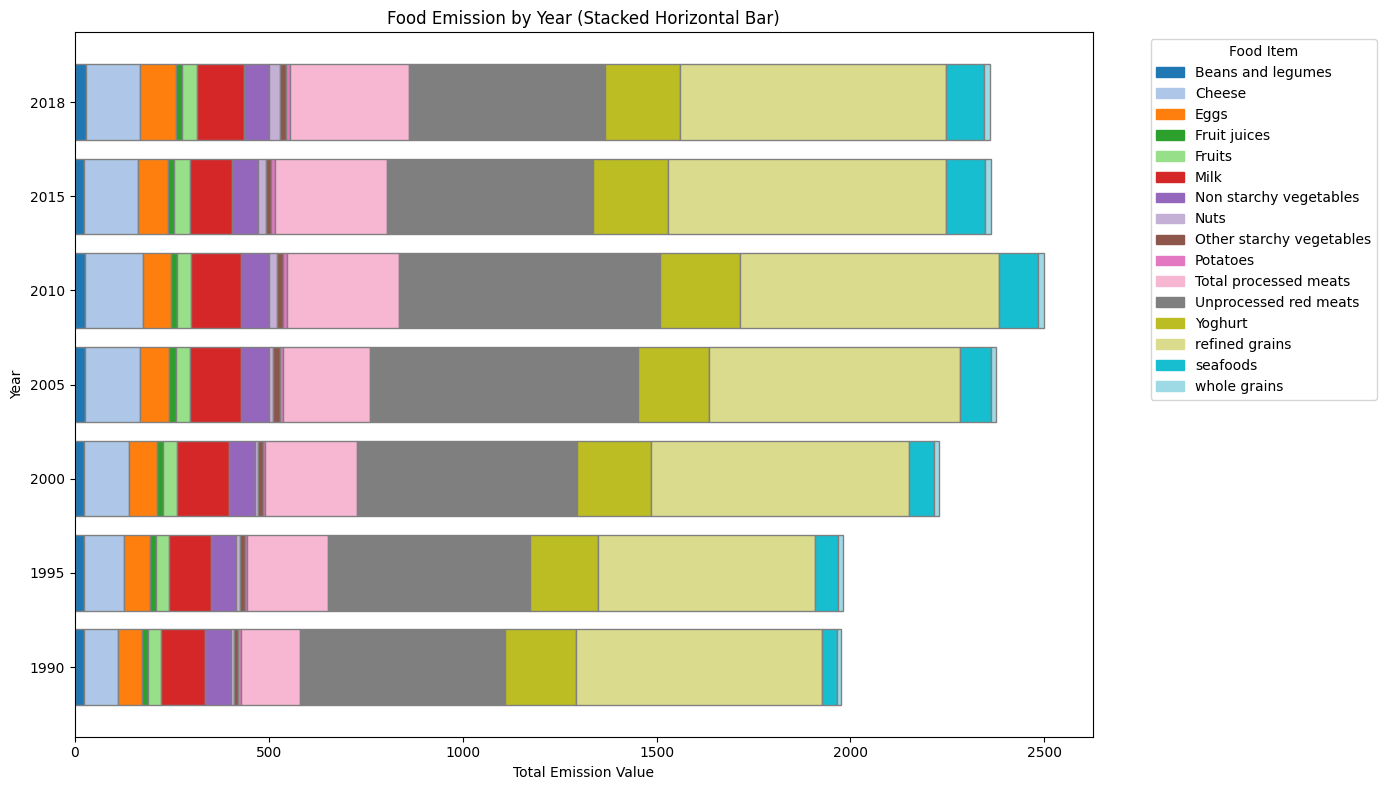


All consolidated plots generated.


In [8]:
# Get unique food items and years for consistent coloring and ordering
all_food_items = sorted(emr_df['food_item'].unique())
unique_years = sorted(emr_df['year'].unique())

# Create a color map for food items
# Using a colormap that provides distinct colors. 'tab20' or 'Set3' are good options.
# If more than 20 food items, you might need a different strategy or a more extensive colormap.
cmap = plt.cm.get_cmap('tab20', len(all_food_items))
food_color_map = {food: cmap(i) for i, food in enumerate(all_food_items)}

# --- Create Stacked Horizontal Bar Plot for Consumption across Years ---
print("\n--- Generating consolidated plot for Consumption ---")

# Pivot the dataframe for consumption
consumption_pivot = emr_df.pivot_table(
    index='year',
    columns='food_item',
    values='consumption',
    fill_value=0 # Fill missing food items for a year with 0
)
# Ensure the food items are in a consistent order
consumption_pivot = consumption_pivot[all_food_items]
# Sort years if desired (e.g., ascending for older to newer at the bottom)
consumption_pivot = consumption_pivot.sort_index(ascending=True)


fig_consumption, ax_consumption = plt.subplots(figsize=(14, 8)) # Adjust figure size

# Plot each year's stacked bar
for year_val in consumption_pivot.index:
    left_consumption = 0
    for food_item in consumption_pivot.columns:
        value = consumption_pivot.loc[year_val, food_item]
        if value > 0: # Only plot if there's a value
            ax_consumption.barh(
                str(year_val),  # Y-axis is the year
                value,
                left=left_consumption,
                label=food_item.replace('_', ' ') if year_val == consumption_pivot.index[0] else "", # Label only for the first set of bars to avoid duplicate legend entries
                color=food_color_map[food_item],
                edgecolor='grey' # Add a thin border to segments
            )
            left_consumption += value

ax_consumption.set_xlabel('Total Consumption Value')
ax_consumption.set_ylabel('Year')
ax_consumption.set_title('Food Consumption by Year (Stacked Horizontal Bar)')

# Create custom legend to avoid duplicates and ensure all food items are shown
handles = [plt.Rectangle((0,0),1,1, color=food_color_map[food]) for food in all_food_items]
labels = [food.replace('_', ' ') for food in all_food_items]
ax_consumption.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# --- Create Stacked Horizontal Bar Plot for Emission across Years ---
print("\n--- Generating consolidated plot for Emission ---")

# Pivot the dataframe for emission
emission_pivot = emr_df.pivot_table(
    index='year',
    columns='food_item',
    values='emission',
    fill_value=0 # Fill missing food items for a year with 0
)
# Ensure the food items are in a consistent order
emission_pivot = emission_pivot[all_food_items]
# Sort years
emission_pivot = emission_pivot.sort_index(ascending=True)


fig_emission, ax_emission = plt.subplots(figsize=(14, 8)) # Adjust figure size

# Plot each year's stacked bar
for year_val in emission_pivot.index:
    left_emission = 0
    for food_item in emission_pivot.columns:
        value = emission_pivot.loc[year_val, food_item]
        if value > 0: # Only plot if there's a value
            ax_emission.barh(
                str(year_val),  # Y-axis is the year
                value,
                left=left_emission,
                # Label only for the first set of bars to avoid duplicate legend entries
                label=food_item.replace('_', ' ') if year_val == emission_pivot.index[0] else "",
                color=food_color_map[food_item], # Use the same color map
                edgecolor='grey' # Add a thin border to segments
            )
            left_emission += value

ax_emission.set_xlabel('Total Emission Value')
ax_emission.set_ylabel('Year')
ax_emission.set_title('Food Emission by Year (Stacked Horizontal Bar)')

# Use the same custom legend handles and labels
ax_emission.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\nAll consolidated plots generated.")


--- Generating consolidated plot for Consumption ---


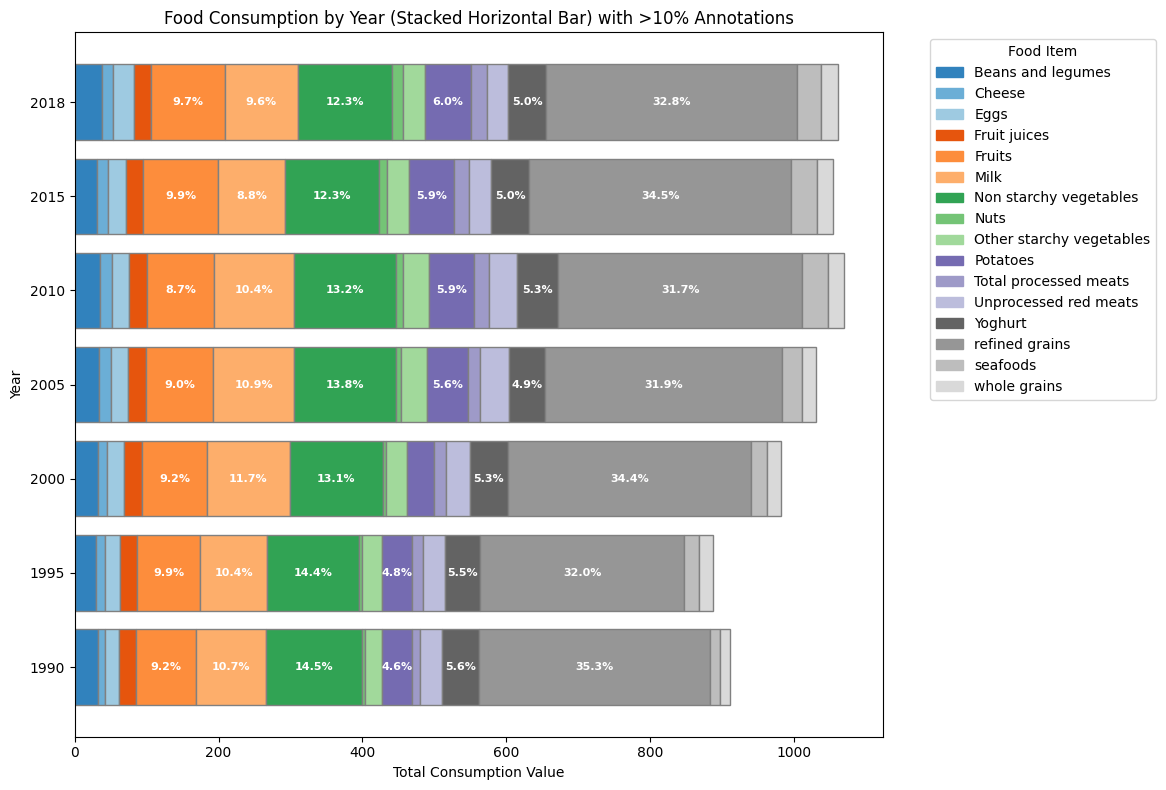


--- Generating consolidated plot for Emission ---


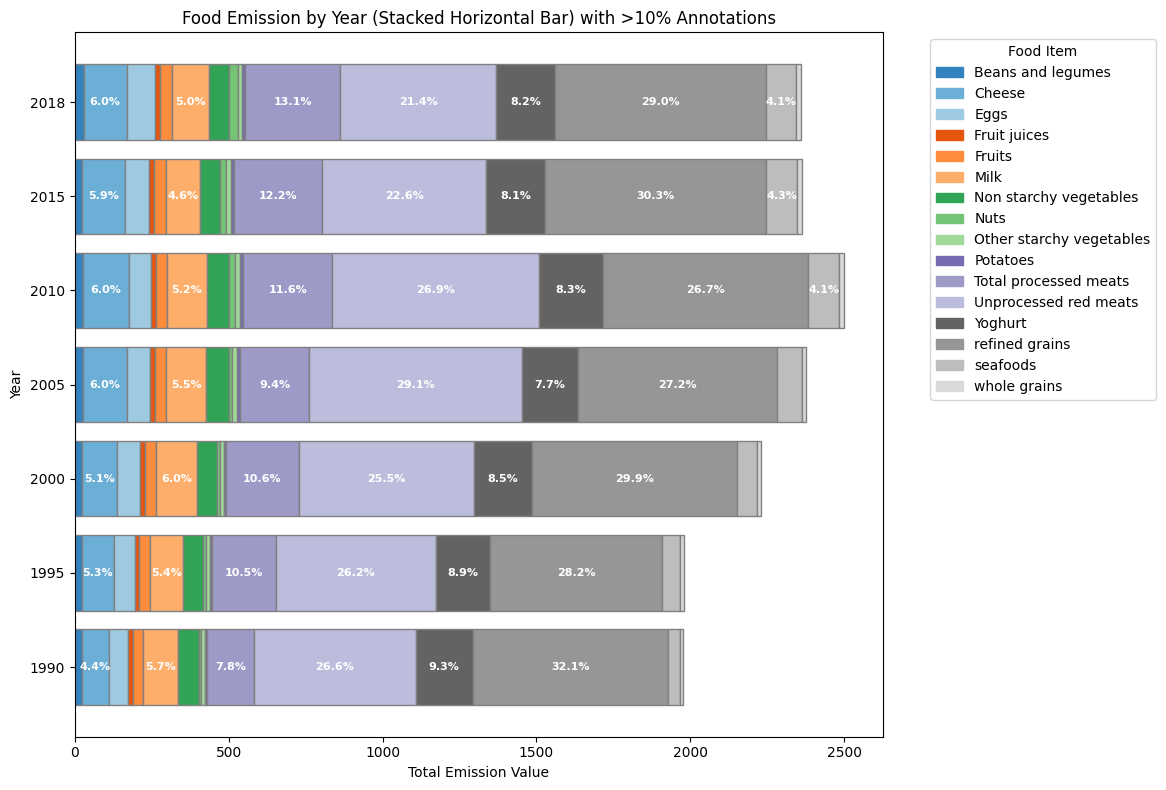


All consolidated plots generated with >10% percentage annotations.


In [9]:
# Create a color map for food items
# Using a colormap that provides distinct colors. 'tab20' or 'Set3' are good options.
# If more than 20 food items, you might need a different strategy or a more extensive colormap.
cmap = plt.cm.get_cmap('tab20c', len(all_food_items))
food_color_map = {food: cmap(i) for i, food in enumerate(all_food_items)}

# --- Create Stacked Horizontal Bar Plot for Consumption across Years ---
print("\n--- Generating consolidated plot for Consumption ---")

# Pivot the dataframe for consumption
consumption_pivot = emr_df.pivot_table(
    index='year',
    columns='food_item',
    values='consumption',
    fill_value=0 # Fill missing food items for a year with 0
)
# Ensure the food items are in a consistent order
consumption_pivot = consumption_pivot[all_food_items]
# Sort years if desired (e.g., ascending for older to newer at the bottom)
consumption_pivot = consumption_pivot.sort_index(ascending=True)

fig_consumption, ax_consumption = plt.subplots(figsize=(14, 8)) # Adjust figure size

# Plot each year's stacked bar
for year_val in consumption_pivot.index:
    left_consumption = 0
    year_total_consumption = consumption_pivot.loc[year_val].sum() # Calculate total for the year
    for food_item in consumption_pivot.columns:
        value = consumption_pivot.loc[year_val, food_item]
        if value > 0: # Only plot if there's a value
            # Plot the bar segment
            ax_consumption.barh(
                str(year_val),  # Y-axis is the year
                value,
                left=left_consumption,
                label=food_item.replace('_', ' ') if year_val == consumption_pivot.index[0] else "", # Label only for the first set of bars
                color=food_color_map[food_item],
                edgecolor='grey' # Add a thin border to segments
            )

            # Add annotation if the proportion is > 10%
            proportion = value / year_total_consumption if year_total_consumption > 0 else 0
            if proportion > 0.04:
                # Format the proportion as a percentage string
                annotation_text = f'{proportion:.1%}' # e.g., '15.2%'
                # Calculate text position in the center of the bar segment
                text_x = left_consumption + value / 2
                text_y = str(year_val) # Y position is the year
                ax_consumption.text(
                    text_x,
                    text_y,
                    annotation_text,
                    ha='center', # Center horizontally
                    va='center', # Center vertically
                    color='white', # White text for visibility on colored bars
                    fontsize=8,
                    weight='bold' # Make text bold
                )

            left_consumption += value

ax_consumption.set_xlabel('Total Consumption Value')
ax_consumption.set_ylabel('Year')
ax_consumption.set_title('Food Consumption by Year (Stacked Horizontal Bar) with >10% Annotations')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=food_color_map[food]) for food in all_food_items]
labels = [food.replace('_', ' ') for food in all_food_items]
ax_consumption.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlap
plt.show()


# --- Create Stacked Horizontal Bar Plot for Emission across Years ---
print("\n--- Generating consolidated plot for Emission ---")

# Pivot the dataframe for emission
emission_pivot = emr_df.pivot_table(
    index='year',
    columns='food_item',
    values='emission',
    fill_value=0 # Fill missing food items for a year with 0
)
# Ensure the food items are in a consistent order
emission_pivot = emission_pivot[all_food_items]
# Sort years
emission_pivot = emission_pivot.sort_index(ascending=True)

fig_emission, ax_emission = plt.subplots(figsize=(14, 8)) # Adjust figure size

# Plot each year's stacked bar
for year_val in emission_pivot.index:
    left_emission = 0
    year_total_emission = emission_pivot.loc[year_val].sum() # Calculate total for the year
    for food_item in emission_pivot.columns:
        value = emission_pivot.loc[year_val, food_item]
        if value > 0: # Only plot if there's a value
            # Plot the bar segment
            ax_emission.barh(
                str(year_val),  # Y-axis is the year
                value,
                left=left_emission,
                label=food_item.replace('_', ' ') if year_val == emission_pivot.index[0] else "", # Label only for the first set of bars
                color=food_color_map[food_item], # Use the same color map
                edgecolor='grey' # Add a thin border to segments
            )

            # Add annotation if the proportion is > 10%
            proportion = value / year_total_emission if year_total_emission > 0 else 0
            if proportion > 0.04:
                 # Format the proportion as a percentage string
                annotation_text = f'{proportion:.1%}' # e.g., '15.2%'
                 # Calculate text position in the center of the bar segment
                text_x = left_emission + value / 2
                text_y = str(year_val) # Y position is the year
                ax_emission.text(
                    text_x,
                    text_y,
                    annotation_text,
                    ha='center', # Center horizontally
                    va='center', # Center vertically
                    color='white', # White text for visibility
                    fontsize=8,
                    weight='bold' # Make text bold
                )
        left_emission += value

ax_emission.set_xlabel('Total Emission Value')
ax_emission.set_ylabel('Year')
ax_emission.set_title('Food Emission by Year (Stacked Horizontal Bar) with >10% Annotations')

# Use the same custom legend handles and labels
ax_emission.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlap
plt.show()

print("\nAll consolidated plots generated with >10% percentage annotations.")


--- Generating Consumption Comparison Plot ---


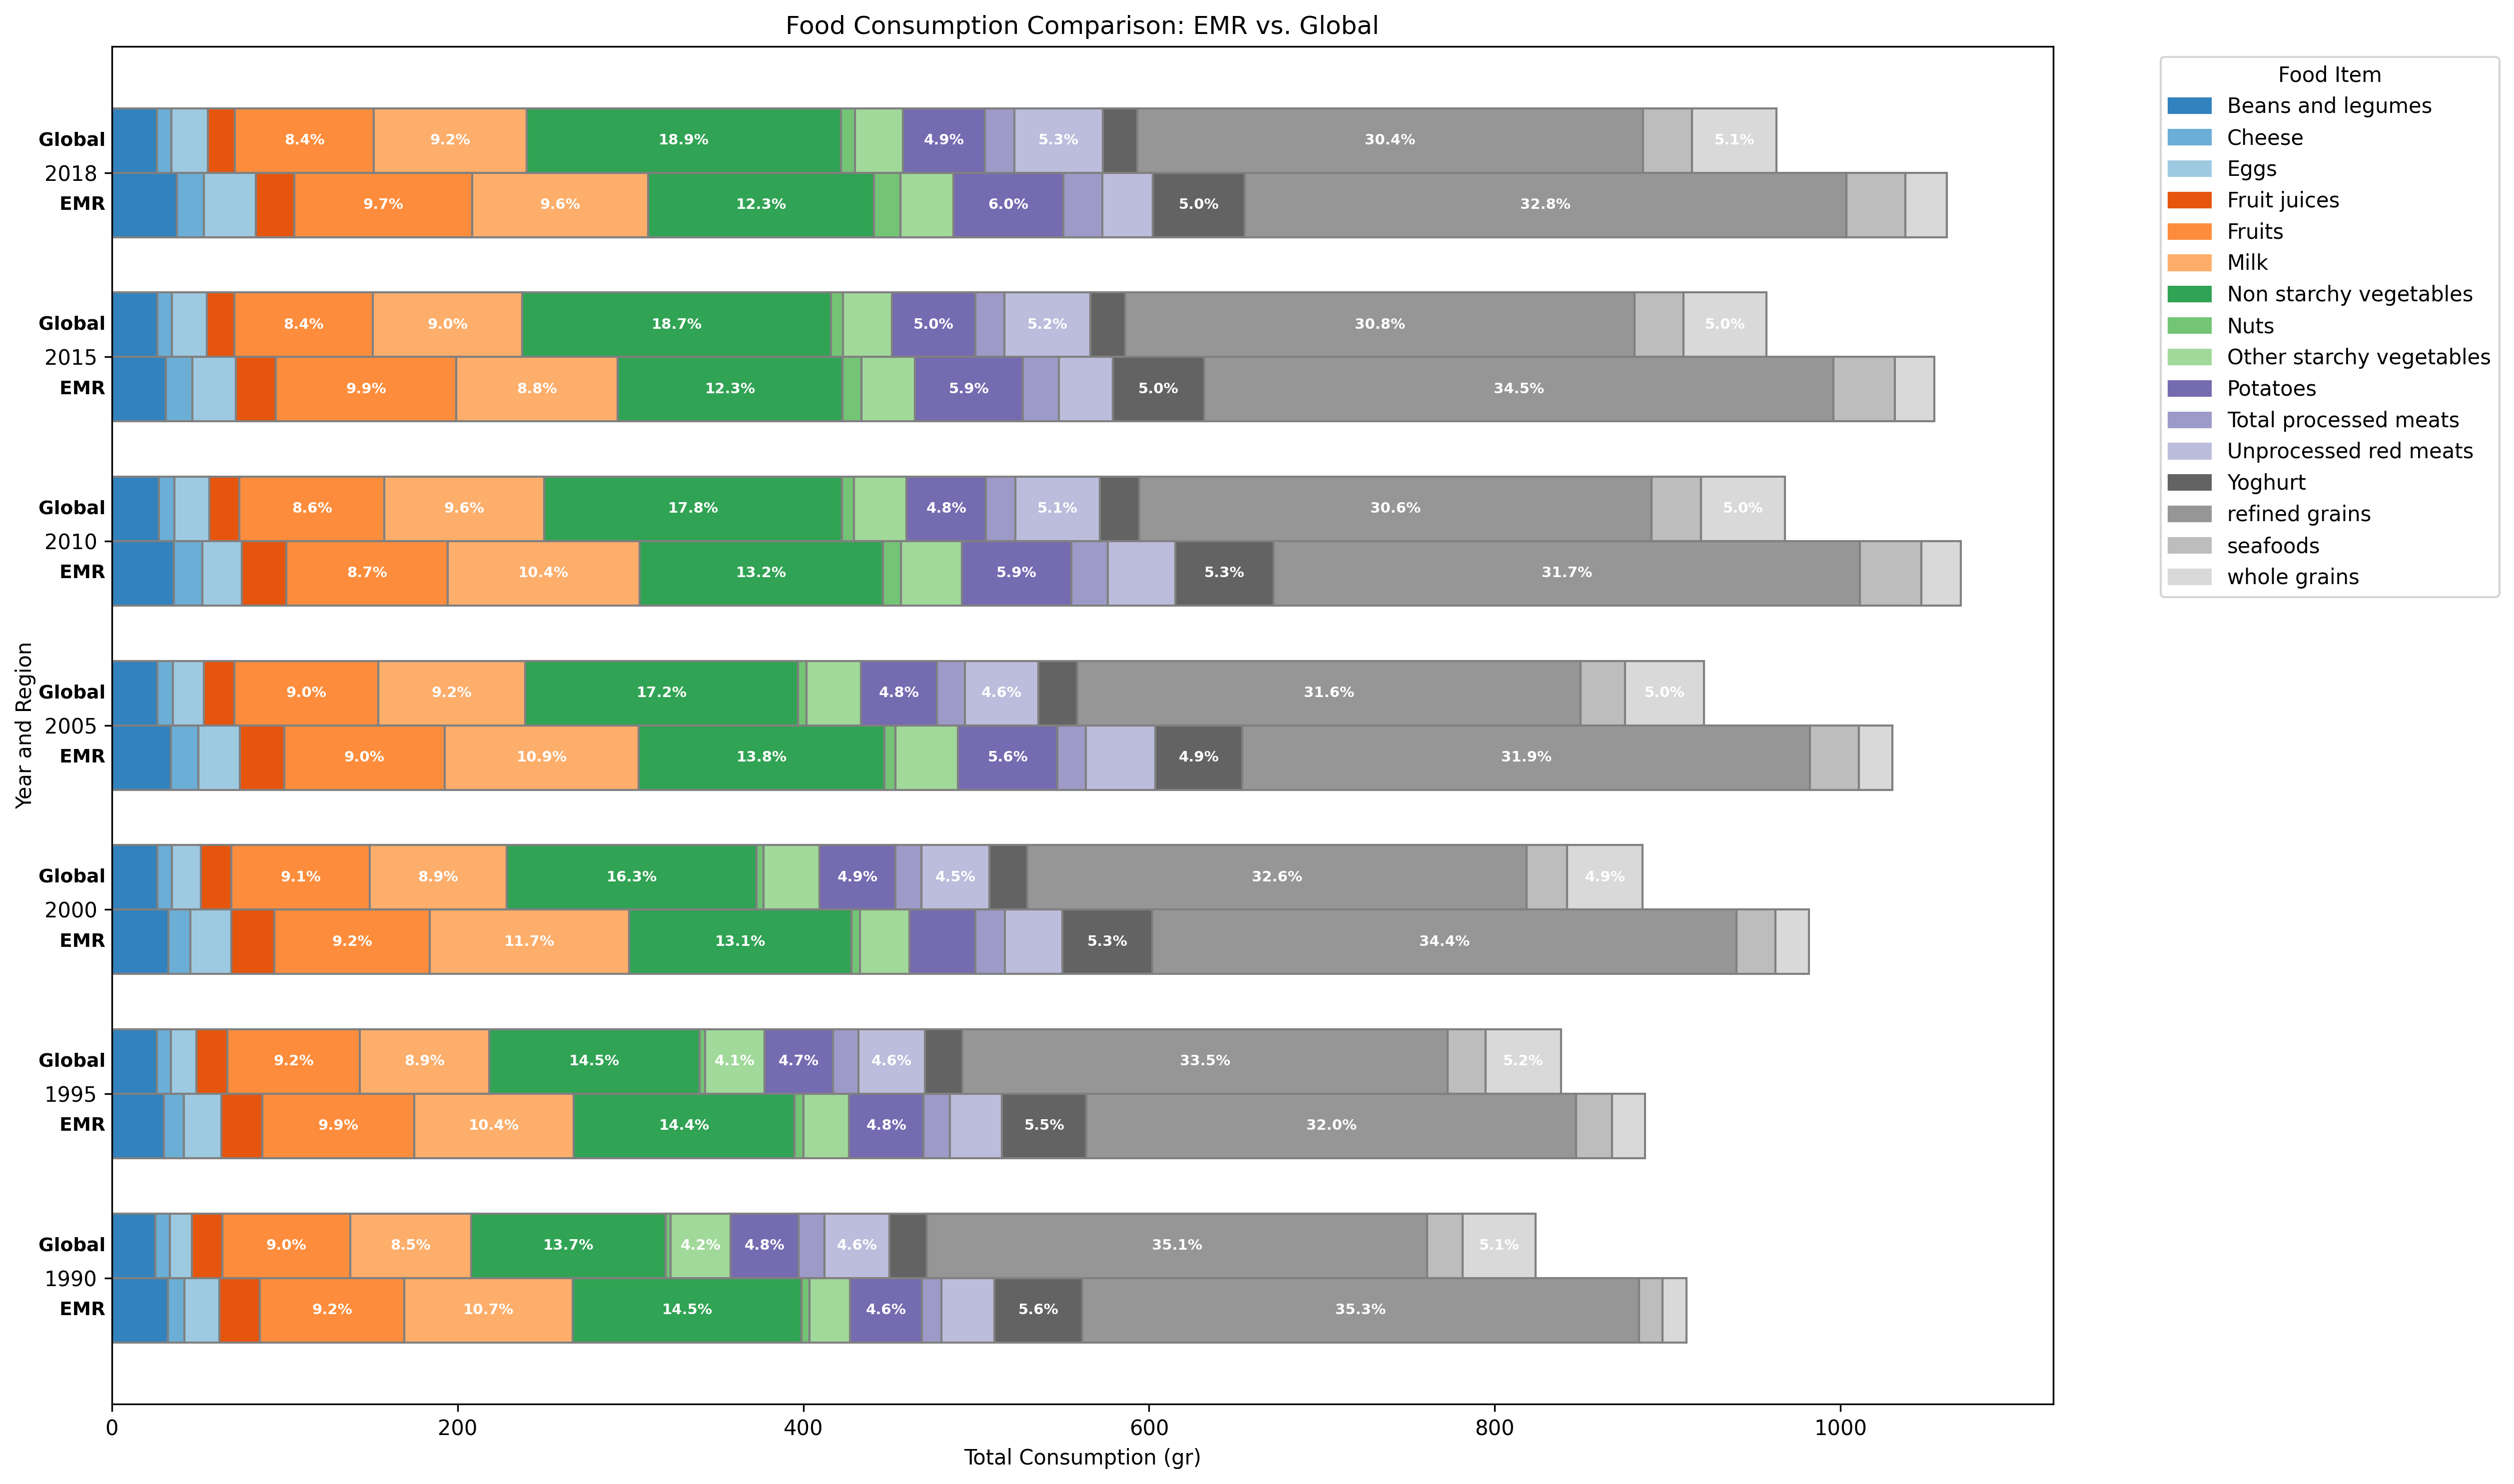


--- Generating Emission Comparison Plot ---


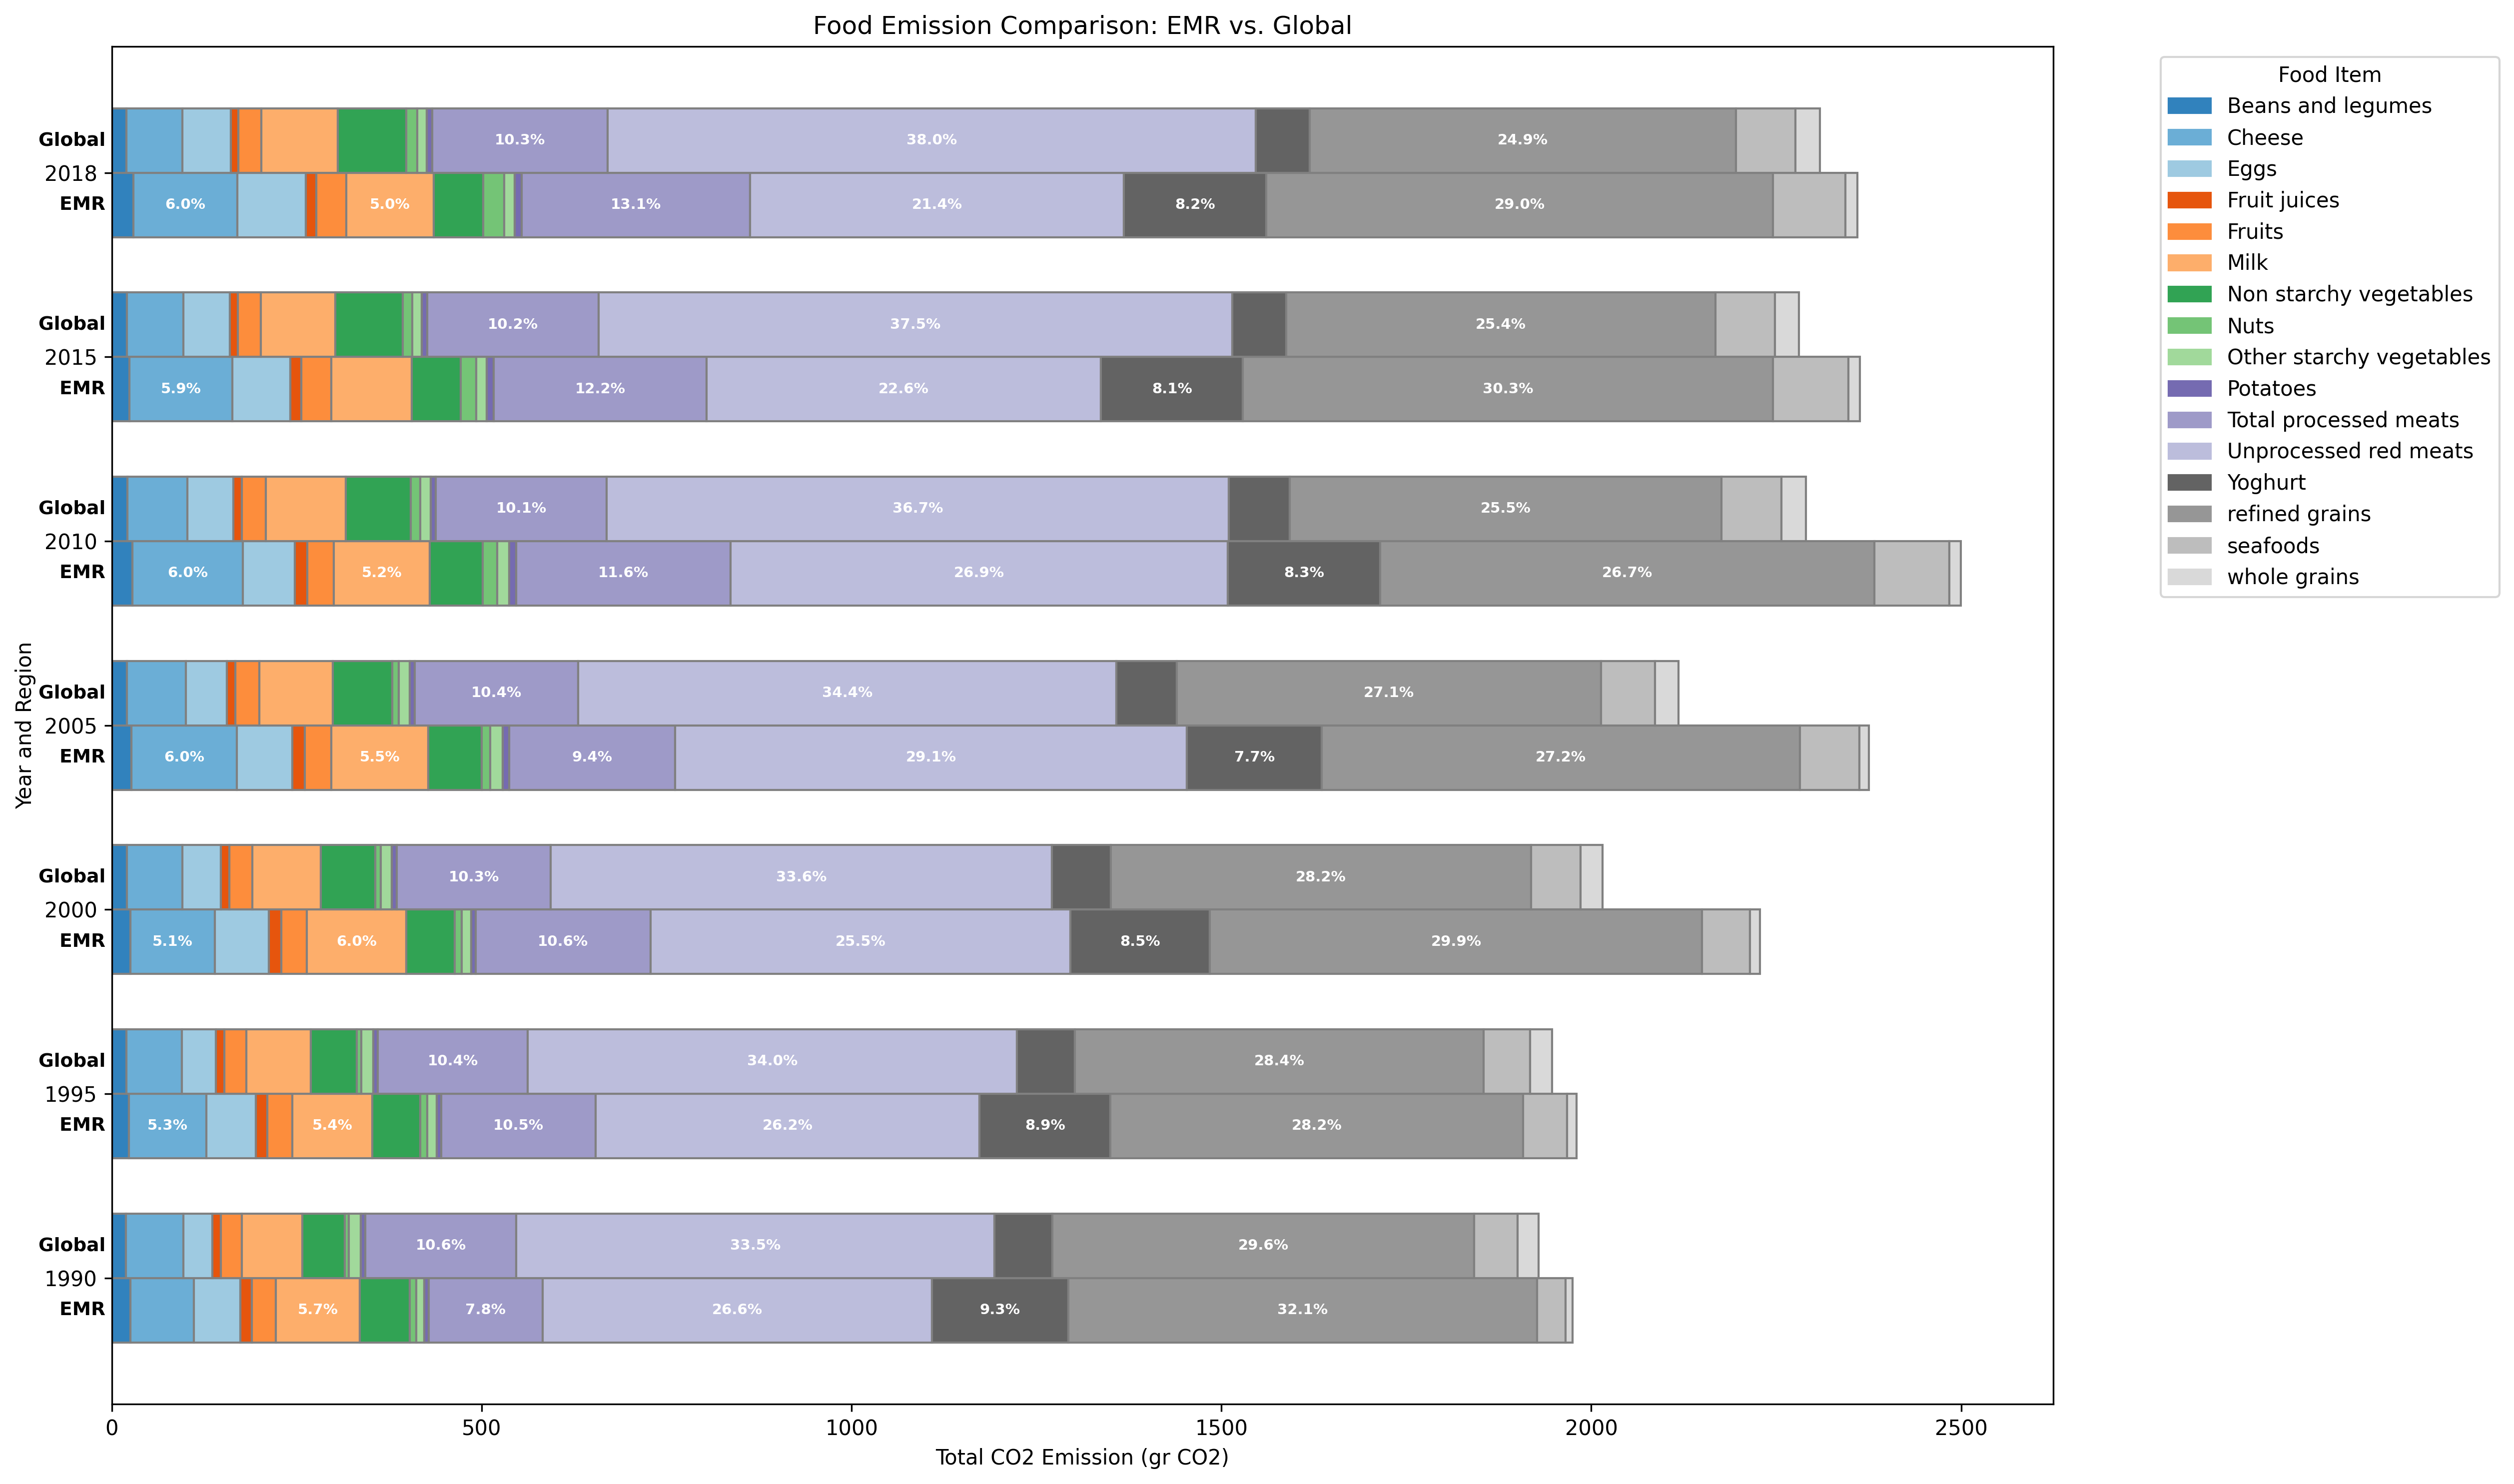


Comparison plots for Consumption and Emission generated with >4% percentage annotations per region per year.


In [19]:
# --- Combine dataframes to get all unique food items and years ---
combined_df = pd.concat([emr_df.assign(region='EMR'), global_df.assign(region='Global')])
combined_df['year'] = combined_df['year'].astype(int) # Ensure year is treated as an integer
all_food_items = sorted(combined_df['food_item'].unique())
unique_years = sorted(combined_df['year'].unique())

# Create a color map for food items
cmap = plt.cm.get_cmap('tab20c', len(all_food_items))
food_color_map = {food: cmap(i) for i, food in enumerate(all_food_items)}

# --- Create Pivot Tables for EMR and Global ---
emr_consumption_pivot = emr_df.pivot_table(index='year', columns='food_item', values='consumption', fill_value=0).reindex(columns=all_food_items, fill_value=0)
emr_emission_pivot = emr_df.pivot_table(index='year', columns='food_item', values='emission', fill_value=0).reindex(columns=all_food_items, fill_value=0)
global_consumption_pivot = global_df.pivot_table(index='year', columns='food_item', values='consumption', fill_value=0).reindex(columns=all_food_items, fill_value=0)
global_emission_pivot = global_df.pivot_table(index='year', columns='food_item', values='emission', fill_value=0).reindex(columns=all_food_items, fill_value=0)

# Ensure pivots cover all years and food items and are sorted by year
emr_consumption_pivot = emr_consumption_pivot.reindex(index=unique_years, fill_value=0).sort_index(ascending=True)
emr_emission_pivot = emr_emission_pivot.reindex(index=unique_years, fill_value=0).sort_index(ascending=True)
global_consumption_pivot = global_consumption_pivot.reindex(index=unique_years, fill_value=0).sort_index(ascending=True)
global_emission_pivot = global_emission_pivot.reindex(index=unique_years, fill_value=0).sort_index(ascending=True)


# --- Create Stacked Horizontal Bar Plot for Consumption Comparison ---
print("\n--- Generating Consumption Comparison Plot ---")

fig_consumption, ax_consumption = plt.subplots(figsize=(20, 10),dpi=300) # Adjust figure size

bar_height = 0.35 # Height of each region's bar for a given year
y_offset = bar_height / 2

# Get the numerical positions for the years on the y-axis
y_positions = np.arange(len(unique_years))

for i, year_val in enumerate(unique_years):
    # --- Plot EMR Consumption ---
    left_emr = 0
    emr_year_data = emr_consumption_pivot.loc[year_val]
    emr_year_total = emr_year_data.sum()
    y_pos_emr_numeric = y_positions[i] - y_offset

    for food_item in all_food_items:
        emr_value = emr_year_data[food_item]
        if emr_value > 0:
            ax_consumption.barh(
                y_pos_emr_numeric, # Numerical y position
                emr_value,
                left=left_emr,
                height=bar_height,
                color=food_color_map[food_item],
                edgecolor='grey'
            )

            # Annotate EMR if proportion > 4%
            emr_proportion = emr_value / emr_year_total if emr_year_total > 0 else 0
            if emr_proportion > 0.04:
                 ax_consumption.text(
                     left_emr + emr_value/2,
                     y_pos_emr_numeric,
                     f'{emr_proportion:.1%}',
                     ha='center', va='center',
                     color='white', fontsize=7, weight='bold'
                 )
            left_emr += emr_value

    # --- Plot Global Consumption ---
    left_global = 0
    global_year_data = global_consumption_pivot.loc[year_val]
    global_year_total = global_year_data.sum()
    y_pos_global_numeric = y_positions[i] + y_offset

    for food_item in all_food_items:
        global_value = global_year_data[food_item]
        if global_value > 0:
            ax_consumption.barh(
                y_pos_global_numeric, # Numerical y position
                global_value,
                left=left_global,
                height=bar_height,
                color=food_color_map[food_item], # Use the same color map
                edgecolor='grey'
            )

            # Annotate Global if proportion > 4%
            global_proportion = global_value / global_year_total if global_year_total > 0 else 0
            if global_proportion > 0.04:
                 ax_consumption.text(
                     left_global + global_value/2,
                     y_pos_global_numeric,
                     f'{global_proportion:.1%}',
                     ha='center', va='center',
                     color='white', fontsize=7, weight='bold'
                 )
            left_global += global_value

    # Add region labels next to the bars for clarity
    ax_consumption.text(0, y_pos_emr_numeric, 'EMR ', ha='right', va='center', fontsize=9, color='black', weight='bold')
    ax_consumption.text(0, y_pos_global_numeric, 'Global ', ha='right', va='center', fontsize=9, color='black', weight='bold')


# Set y-axis ticks and labels
ax_consumption.set_yticks(y_positions) # Position ticks at 0, 1, 2...
ax_consumption.set_yticklabels(unique_years) # Label ticks with the actual years

ax_consumption.set_xlabel('Total Consumption (gr)')
ax_consumption.set_ylabel('Year and Region')
ax_consumption.set_title('Food Consumption Comparison: EMR vs. Global')

# Create custom legend for food items
handles = [plt.Rectangle((0,0),1,1, color=food_color_map[food]) for food in all_food_items]
labels = [food.replace('_', ' ') for food in all_food_items]
ax_consumption.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlap
plt.savefig('../figures/consumption_comparison.png', dpi=300, bbox_inches='tight') # Save the figure
plt.show()


# --- Create Stacked Horizontal Bar Plot for Emission Comparison ---
print("\n--- Generating Emission Comparison Plot ---")

fig_emission, ax_emission = plt.subplots(figsize=(20, 10),dpi=300) # Adjust figure size

# Use the same bar height and y_positions
# bar_height = 0.35
# y_offset = bar_height / 2
# y_positions = np.arange(len(unique_years))

for i, year_val in enumerate(unique_years):
    # --- Plot EMR Emission ---
    left_emr = 0
    emr_year_data = emr_emission_pivot.loc[year_val]
    emr_year_total = emr_year_data.sum()
    y_pos_emr_numeric = y_positions[i] - y_offset

    for food_item in all_food_items:
        emr_value = emr_year_data[food_item]
        if emr_value > 0:
            ax_emission.barh(
                y_pos_emr_numeric, # Numerical y position
                emr_value,
                left=left_emr,
                height=bar_height,
                color=food_color_map[food_item],
                edgecolor='grey'
            )

            # Annotate EMR if proportion > 4%
            emr_proportion = emr_value / emr_year_total if emr_year_total > 0 else 0
            if emr_proportion > 0.05:
                 ax_emission.text(
                     left_emr + emr_value/2,
                     y_pos_emr_numeric,
                     f'{emr_proportion:.1%}',
                     ha='center', va='center',
                     color='white', fontsize=7, weight='bold'
                 )
            left_emr += emr_value

    # --- Plot Global Emission ---
    left_global = 0
    global_year_data = global_emission_pivot.loc[year_val]
    global_year_total = global_year_data.sum()
    y_pos_global_numeric = y_positions[i] + y_offset

    for food_item in all_food_items:
        global_value = global_year_data[food_item]
        if global_value > 0:
            ax_emission.barh(
                y_pos_global_numeric, # Numerical y position
                global_value,
                left=left_global,
                height=bar_height,
                color=food_color_map[food_item], # Use the same color map
                edgecolor='grey'
            )

            # Annotate Global if proportion > 4%
            global_proportion = global_value / global_year_total if global_year_total > 0 else 0
            if global_proportion > 0.05:
                 ax_emission.text(
                     left_global + global_value/2,
                     y_pos_global_numeric,
                     f'{global_proportion:.1%}',
                     ha='center', va='center',
                     color='white', fontsize=7, weight='bold'
                 )
            left_global += global_value

    # Add region labels next to the bars for clarity
    ax_emission.text(0, y_pos_emr_numeric, 'EMR ', ha='right', va='center', fontsize=9, color='black', weight='bold')
    ax_emission.text(0, y_pos_global_numeric, 'Global ', ha='right', va='center', fontsize=9, color='black', weight='bold')


# Set y-axis ticks and labels
ax_emission.set_yticks(y_positions) # Position ticks at 0, 1, 2...
ax_emission.set_yticklabels(unique_years) # Label ticks with the actual years

ax_emission.set_xlabel('Total CO2 Emission (gr CO2)')
ax_emission.set_ylabel('Year and Region')
ax_emission.set_title('Food Emission Comparison: EMR vs. Global')

# Use the same custom legend handles and labels
ax_emission.legend(handles, labels, title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlap
plt.savefig('../figures/emission_comparison.png', dpi=300, bbox_inches='tight') # Save the figure
plt.show()

print("\nComparison plots for Consumption and Emission generated with >4% percentage annotations per region per year.")

In [17]:
emr_df.to_csv('analysis/emr_df.csv', index=False)
global_df.to_csv('analysis/global_df.csv', index=False)